# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
     #                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
      #                       mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
       #                      ) 
    # Draw pose connections
    #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
     #                        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
      #                       mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
       #                      ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results.left_hand_landmarks.landmark


[x: 0.899458646774292
y: 0.8767930865287781
z: 5.724516540794866e-07
, x: 0.7917346954345703
y: 0.841694712638855
z: -0.023622440174221992
, x: 0.7182573676109314
y: 0.741322934627533
z: -0.032242365181446075
, x: 0.6812564730644226
y: 0.6369343996047974
z: -0.04067181050777435
, x: 0.639153003692627
y: 0.5600284934043884
z: -0.04801375791430473
, x: 0.7324378490447998
y: 0.5764280557632446
z: -0.0026260856539011
, x: 0.6956325769424438
y: 0.4423321485519409
z: -0.023448636755347252
, x: 0.6751327514648438
y: 0.36107075214385986
z: -0.044309165328741074
, x: 0.6593554019927979
y: 0.28962984681129456
z: -0.0597282350063324
, x: 0.7844279408454895
y: 0.5491011738777161
z: -0.011231355369091034
, x: 0.7454991936683655
y: 0.3979841470718384
z: -0.02797855995595455
, x: 0.718970775604248
y: 0.3020510673522949
z: -0.05019478127360344
, x: 0.6970600485801697
y: 0.2219904661178589
z: -0.0668434128165245
, x: 0.8393664360046387
y: 0.5523369908332825
z: -0.025007158517837524
, x: 0.8081160783767

In [10]:
draw_landmarks(frame, results)

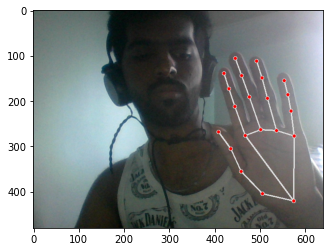

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose

[array([ 0.4688386 ,  0.32222831, -0.80271435,  0.99993682]),
 array([ 0.48819798,  0.21675345, -0.77290851,  0.99988461]),
 array([ 0.51275402,  0.20865655, -0.77221096,  0.99988633]),
 array([ 0.53331983,  0.2012537 , -0.77132571,  0.99985892]),
 array([ 0.41116557,  0.23968142, -0.74219251,  0.99989879]),
 array([ 0.38793609,  0.24670976, -0.74088717,  0.99989665]),
 array([ 0.36850867,  0.25472379, -0.74098152,  0.99989045]),
 array([ 0.57177204,  0.21792774, -0.46215886,  0.9998759 ]),
 array([ 0.34786361,  0.30186397, -0.30724609,  0.99992859]),
 array([ 0.52420962,  0.39093271, -0.68457973,  0.99994451]),
 array([ 0.43305039,  0.42257425, -0.6384328 ,  0.99994791]),
 array([ 0.80997038,  0.5924871 , -0.27727354,  0.99951863]),
 array([ 0.27787739,  0.7983824 , -0.09608389,  0.99957651]),
 array([ 1.00735402,  0.98698556, -0.69672567,  0.85128808]),
 array([ 0.22106159,  1.31745315, -0.14363524,  0.19507125]),
 array([ 0.79273808,  0.74709213, -1.1436379 ,  0.98330605]),
 array([

In [15]:
#pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [17]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    #lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return rh

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
468*3+33*4+21*3+21*3

1662

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['A', 'B','C','D','E'])

# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 20

In [81]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [82]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [83]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [84]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(100, 20, 63)

In [28]:
np.array(labels).shape

(100,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(100, 20, 63)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1,

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [34]:
y_test.shape

(10, 5)

# 7. Build and Train LSTM Neural Network

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [98]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [99]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,63)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [100]:
res = [.7, 0.2, 0.1]

In [101]:
actions[np.argmax(res)]

'A'

In [102]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 38ms/step - loss: 1.6127 - categorical_accuracy: 0.1895
Epoch 2/2000
3/3 [==============================] - 0s 32ms/step - loss: 1.6076 - categorical_accuracy: 0.2000
Epoch 3/2000
3/3 [==============================] - 0s 31ms/step - loss: 1.6032 - categorical_accuracy: 0.2526
Epoch 4/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.5950 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.5822 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 28ms/step - loss: 1.5522 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.4815 - categorical_accuracy: 0.3895
Epoch 8/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.2636 - categorical_accuracy: 0.4526
Epoch 9/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.0947 - categorical_accuracy: 0.4842
E

3/3 [==============================] - 0s 23ms/step - loss: 1.4101e-05 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 23ms/step - loss: 1.3763e-05 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.3441e-05 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.3162e-05 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.2911e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2644e-05 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.2394e-05 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2121e-05 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.18

3/3 [==============================] - 0s 30ms/step - loss: 1.8847e-06 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 30ms/step - loss: 1.8634e-06 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.8283e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 30ms/step - loss: 1.7956e-06 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 32ms/step - loss: 1.7567e-06 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 25ms/step - loss: 1.7354e-06 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.7103e-06 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.6865e-06 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.66

3/3 [==============================] - 0s 65ms/step - loss: 5.6969e-07 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 63ms/step - loss: 5.6844e-07 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 66ms/step - loss: 5.6216e-07 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 65ms/step - loss: 5.5840e-07 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 66ms/step - loss: 5.5463e-07 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 62ms/step - loss: 5.5338e-07 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 62ms/step - loss: 5.4836e-07 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 66ms/step - loss: 5.4585e-07 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 64ms/step - loss: 5.42

3/3 [==============================] - 0s 64ms/step - loss: 2.7983e-07 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.7857e-07 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.7732e-07 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.7481e-07 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.7230e-07 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 29ms/step - loss: 2.7230e-07 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 30ms/step - loss: 2.6979e-07 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 32ms/step - loss: 2.6853e-07 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 25ms/step - loss: 2.66

3/3 [==============================] - 0s 63ms/step - loss: 8.6583e-08 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 65ms/step - loss: 8.6583e-08 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 63ms/step - loss: 8.4074e-08 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 65ms/step - loss: 8.4074e-08 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 65ms/step - loss: 8.4074e-08 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 63ms/step - loss: 8.4074e-08 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 65ms/step - loss: 8.4074e-08 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 66ms/step - loss: 8.4074e-08 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 31ms/step - loss: 8.28

3/3 [==============================] - 0s 65ms/step - loss: 4.3919e-08 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 68ms/step - loss: 4.2664e-08 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 65ms/step - loss: 4.2664e-08 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.2664e-08 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 66ms/step - loss: 4.2664e-08 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 62ms/step - loss: 4.2664e-08 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 63ms/step - loss: 4.2664e-08 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 67ms/step - loss: 4.1409e-08 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 63ms/step - loss: 4.14

3/3 [==============================] - 0s 63ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 985/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 69ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.7606e-08 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.6352e-08 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.63

3/3 [==============================] - 0s 66ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1123/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1124/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [==============================] - 0s 64ms/step - loss: 2.0077e-08 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.0077e-08 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.8823e-08 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 65ms/step - lo

3/3 [==============================] - 0s 63ms/step - loss: 1.5058e-08 - categorical_accuracy: 1.0000
Epoch 1261/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.5058e-08 - categorical_accuracy: 1.0000
Epoch 1262/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.5058e-08 - categorical_accuracy: 1.0000
Epoch 1263/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.5058e-08 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.5058e-08 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.6313e-08 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.6313e-08 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.5058e-08 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 62ms/step - lo

3/3 [==============================] - 0s 65ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1399/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1400/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3803e-08 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.3803e-08 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 65ms/step - lo

3/3 [==============================] - 0s 62ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1537/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1538/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0039e-08 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1294e-08 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2548e-08 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0039e-08 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0039e-08 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 63ms/step - lo

3/3 [==============================] - 0s 65ms/step - loss: 8.7838e-09 - categorical_accuracy: 1.0000
Epoch 1675/2000
3/3 [==============================] - 0s 64ms/step - loss: 8.7838e-09 - categorical_accuracy: 1.0000
Epoch 1676/2000
3/3 [==============================] - 0s 60ms/step - loss: 7.5290e-09 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 63ms/step - loss: 8.7838e-09 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0039e-08 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 62ms/step - loss: 7.5290e-09 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 64ms/step - loss: 8.7838e-09 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0039e-08 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 64ms/step - lo

3/3 [==============================] - 0s 65ms/step - loss: 8.7838e-09 - categorical_accuracy: 1.0000
Epoch 1813/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1814/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 0s 63ms/step - loss: 7.5290e-09 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 0s 65ms/step - loss: 7.5290e-09 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 65ms/step - loss: 7.5290e-09 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 62ms/step - loss: 7.5290e-09 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 65ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 66ms/step - lo

3/3 [==============================] - 0s 64ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1951/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 63ms/step - loss: 5.0193e-09 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 62ms/step - loss: 5.0193e-09 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 67ms/step - loss: 6.2742e-09 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.0193e-09 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 66ms/step - loss: 5.0193e-09 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 0s 65ms/step - lo

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 64)            32768     
                                                                 
 lstm_4 (LSTM)               (None, 20, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 187,397
Trainable params: 187,397
Non-tr

# 8. Make Predictions

In [105]:
res = model.predict(X_test)

In [106]:
actions[np.argmax(res[4])]

'B'

In [107]:
actions[np.argmax(y_test[4])]

'B'

# 9. Save Weights

In [108]:
model.save('action.h5')

In [217]:
del model

In [36]:
from keras.models import load_model

model=load_model('action.h5')

In [37]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [38]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [39]:
yhat = model.predict(X_test)

In [40]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[8, 0],
        [0, 2]],

       [[9, 0],
        [0, 1]],

       [[8, 0],
        [0, 2]],

       [[9, 0],
        [0, 1]],

       [[6, 0],
        [0, 4]]], dtype=int64)

In [42]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [115]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [55]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [57]:
sequence

19

In [56]:
len(sequence)

TypeError: object of type 'int' has no len()

In [58]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [117]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-20:]
        
        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>

<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>
C
<class 'mediapipe.python.solution_base.SolutionOutputs'>

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)